### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Internship Rakamin - Kalbe/Dataset CCV 6 - Clustering Model.csv")

In [3]:
df.head()

,id_pelanggan,umur,jenis_kelamin,id_produk,nama_produk,kategori_produk,harga_pembelian
0,1,31,wanita,2,prenagen esensis,woman,54810
1,2,28,wanita,2,prenagen esensis,woman,55539
2,3,21,pria,3,hic1000 vitamin lemon,beverages,55225
3,4,38,pria,6,nutrive benecol,special needs,48295
4,5,42,pria,6,nutrive benecol,special needs,45963


### Eksploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_pelanggan     50 non-null     int64 
 1   umur             50 non-null     int64 
 2   jenis_kelamin    50 non-null     object
 3   id_produk        50 non-null     int64 
 4   nama_produk      50 non-null     object
 5   kategori_produk  50 non-null     object
 6   harga_pembelian  50 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


In [5]:
df.isnull().sum()

id_pelanggan       0
umur               0
jenis_kelamin      0
id_produk          0
nama_produk        0
kategori_produk    0
harga_pembelian    0
dtype: int64

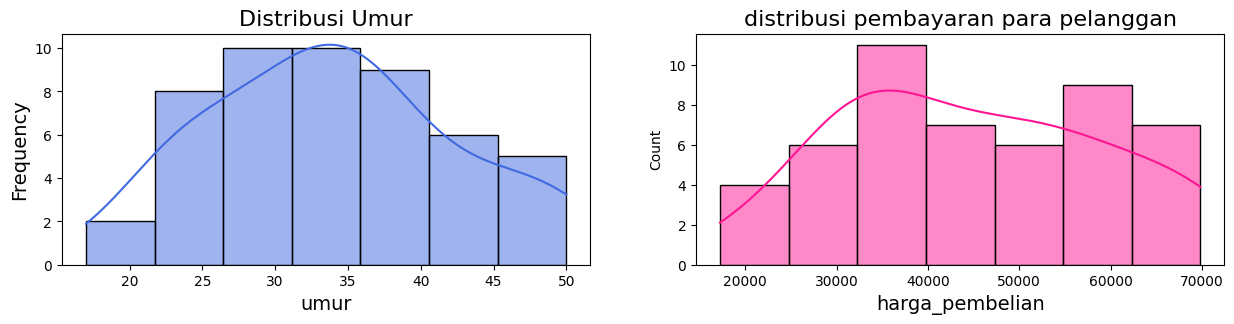

In [6]:
plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
sns.histplot(df['umur'], color='royalblue', kde=True)
plt.title("Distribusi Umur", fontsize=16)
plt.xlabel('umur', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,2,2)
sns.histplot(df['harga_pembelian'], color='deeppink', kde=True)
plt.title('distribusi pembayaran para pelanggan', fontsize =16)
plt.xlabel('harga_pembelian', fontsize=14)

plt.show()

<ipython-input-7-cf3b937a960f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jenis_kelamin', data=df, palette='winter')


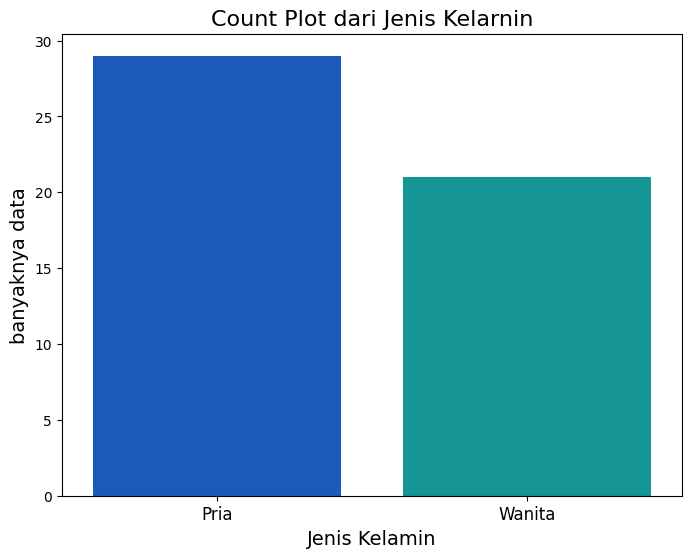

In [7]:
plt. figure (figsize= (8, 6 ))
sns.countplot(x='jenis_kelamin', data=df, palette='winter')
plt.title('Count Plot dari Jenis Kelarnin' , fontsize=16)
plt.xlabel( 'Jenis Kelamin', fontsize=14)
plt.ylabel( 'banyaknya data', fontsize=14)
plt.xticks( [0, 1], [ 'Pria', 'Wanita'], fontsize=12 )
plt.show()

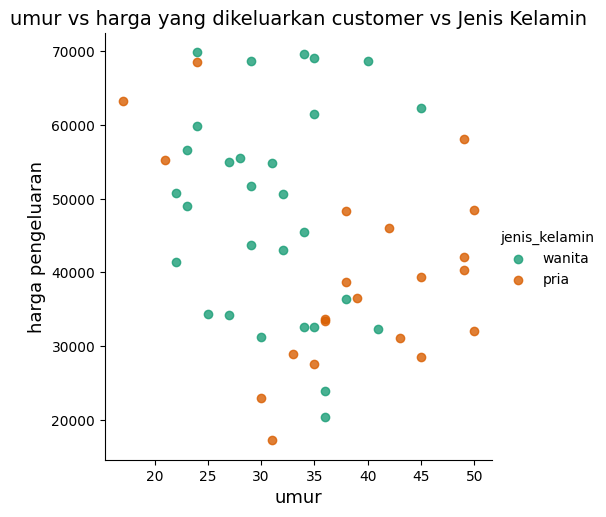

In [8]:
sns.lmplot(x='umur' , y='harga_pembelian', data=df, fit_reg=False, hue='jenis_kelamin', height=5, palette='Dark2')
plt.title( 'umur vs harga yang dikeluarkan customer vs Jenis Kelamin', fontsize=14)
plt.xlabel( 'umur', fontsize=13)
plt.ylabel('harga pengeluaran', fontsize=13)
plt.show()

## K-Means Clustering
### Segmentasi Berdasarkan Umur dan harga yang dikeluarkan
### Menentukan K (banyaknya kelompok) yang optimal

In [9]:
X1 = df[['umur', 'harga_pembelian']]
wcss =[]
for n in range(1, 11):
  model1 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
  model1.fit(X1)
  wcss.append(model1.inertia_)
print(wcss)

[10367243957.220001, 2709910312.055195, 1326172182.178728, 797897839.7089127, 439957213.08888894, 271933067.5527777, 190306062.31944445, 132217680.18452379, 96276902.79999998, 72086028.63333333]


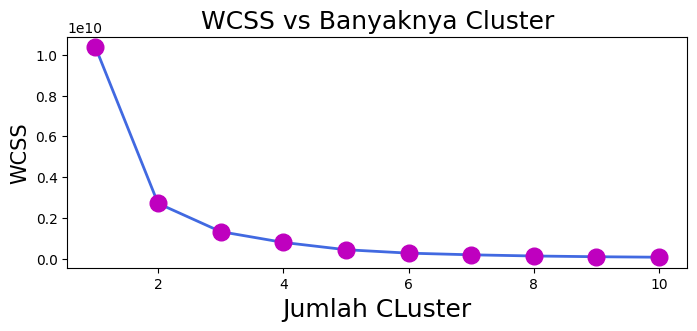

In [10]:
plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS vs Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah CLuster', fontsize=18)
plt.ylabel('WCSS', fontsize=15)
plt.show()

### Membuat model clustering dengan K yang Optimal

In [11]:
model1= KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

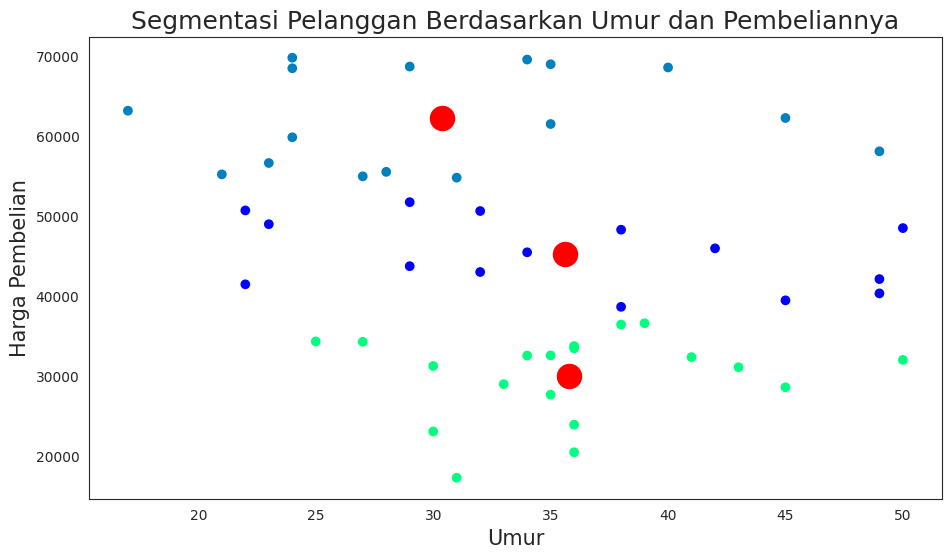

In [13]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['umur'], y=df['harga_pembelian'], c=labels1, cmap='winter')
plt.scatter(x=centroids1[:,0], y=centroids1[:,1], s=300, c='red')
plt.xlabel('Umur', fontsize=15)
plt.ylabel('Harga Pembelian', fontsize=15)
plt.title('Segmentasi Pelanggan Berdasarkan Umur dan Pembeliannya', fontsize=18)
plt.show()